## Exploratory Data Analysis on Predict Futrure Sales 

In [31]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


Load the Data

In [32]:
sales = pd.read_csv("../datasets/predict-future-sales/sales_train.csv")
sales.name = 'sales'
items =  pd.read_csv("../datasets/predict-future-sales/items.csv")
items.name = 'items'
items_cat =  pd.read_csv("../datasets/predict-future-sales/item_categories.csv")
items_cat.name = 'items categories'
shops =  pd.read_csv("../datasets/predict-future-sales/shops.csv")
shops.name = 'shops'
test =  pd.read_csv("../datasets/predict-future-sales/test.csv")
test.name = 'test'
submissions =  pd.read_csv("../datasets/predict-future-sales/sample_submission.csv")
submissions.name = 'submissions' 

Small exploration of the head and shape of each dataframe

In [33]:
racc = [sales, items, items_cat, shops, test, submissions]

for df in racc:
    print("Dimension of ",df.name," is:",df.shape)
    display(df.head())
    print("\n")

Dimension of  sales  is: (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0




Dimension of  items  is: (22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40




Dimension of  items categories  is: (84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4




Dimension of  shops  is: (60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4




Dimension of  test  is: (214200, 3)


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268




Dimension of  submissions  is: (214200, 2)


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


We can notice that the test set has a different size and shape compared to the sales dataset wich is our training dataframe. By comparing the 2 dataframes we can see that the feature present on the test dataframe are "shop_id" and "item_id" and both of them are in the training one as well. 
Get some basics info about the dataframes

In [34]:
for df in racc:
    print("Info aboout: ", df.name, "\n")
    display(df.info())
    print("-"*50)

Info aboout:  sales 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


None

--------------------------------------------------
Info aboout:  items 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


None

--------------------------------------------------
Info aboout:  items categories 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


None

--------------------------------------------------
Info aboout:  shops 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

--------------------------------------------------
Info aboout:  test 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


None

--------------------------------------------------
Info aboout:  submissions 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


None

--------------------------------------------------


Search for Empty or null values

In [35]:
for df in racc:
    print("Info aboout empy or nan values in : ", df.name, "\n")
    display(df.isna().sum())
    print("-"*50)

Info aboout empy or nan values in :  sales 



date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

--------------------------------------------------
Info aboout empy or nan values in :  items 



item_name           0
item_id             0
item_category_id    0
dtype: int64

--------------------------------------------------
Info aboout empy or nan values in :  items categories 



item_category_name    0
item_category_id      0
dtype: int64

--------------------------------------------------
Info aboout empy or nan values in :  shops 



shop_name    0
shop_id      0
dtype: int64

--------------------------------------------------
Info aboout empy or nan values in :  test 



ID         0
shop_id    0
item_id    0
dtype: int64

--------------------------------------------------
Info aboout empy or nan values in :  submissions 



ID                0
item_cnt_month    0
dtype: int64

--------------------------------------------------


In [36]:
for df in racc:
    print("Columns of: ", df.name, "\n")
    display(df.columns.tolist())
    print("-"*50)

Columns of:  sales 



['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']

--------------------------------------------------
Columns of:  items 



['item_name', 'item_id', 'item_category_id']

--------------------------------------------------
Columns of:  items categories 



['item_category_name', 'item_category_id']

--------------------------------------------------
Columns of:  shops 



['shop_name', 'shop_id']

--------------------------------------------------
Columns of:  test 



['ID', 'shop_id', 'item_id']

--------------------------------------------------
Columns of:  submissions 



['ID', 'item_cnt_month']

--------------------------------------------------


Let's make some adjustments to our data

In [37]:
import datetime
sales['date'] = sales['date'].apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y'))

We have converted our data to datetime objects

In [38]:
sales['date'].sample(10)

1886616   2014-08-17
1565573   2014-04-03
278674    2013-03-20
32788     2013-01-19
1918051   2014-08-24
202595    2013-02-25
2432244   2015-02-01
2780250   2015-08-30
51129     2013-01-29
1841792   2014-07-04
Name: date, dtype: datetime64[ns]

In [39]:
sales['day_of_week'] = sales['date'].apply(lambda x: x.weekday())



With weekday object we have for each date the corresponding day of the week.
Monday = 0 --- Sunday = 6

In [40]:
sales.day_of_week.value_counts()

5    590359
6    503104
4    439298
3    367280
2    352962
1    345772
0    337074
Name: day_of_week, dtype: int64

<AxesSubplot:>

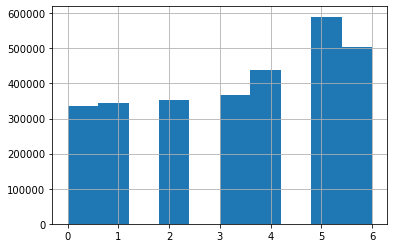

In [41]:
sales.day_of_week.hist()

From the histogram we notice that most sales are made on the weekend.
Let's try to find the months with the most sales.

In [42]:
sales['month_of_year'] = sales['date'].apply(lambda x: x.month)

<AxesSubplot:>

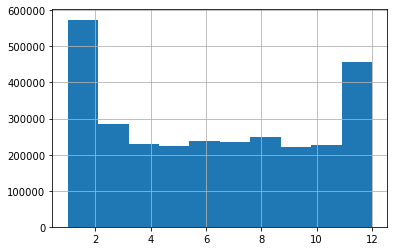

In [43]:
sales.month_of_year.hist()

And the months with the most sales are January and December, we cannot notice any variations on sales during the rest of the year.

In [44]:
sales['year'] = sales['date'].apply(lambda x: x.year)

In [45]:
sales.year.sample(10)

412233     2013
2123986    2014
2611521    2015
1093721    2013
1329229    2014
1529766    2014
2203952    2014
2919670    2015
941857     2013
384287     2013
Name: year, dtype: int64

In [46]:
sales.year.value_counts()

2013    1267562
2014    1055861
2015     612426
Name: year, dtype: int64

And this is the trend of sales year by year. 

Let's group the sales by month on the monthly_sales dataframe

In [47]:
monthly_sales = sales.groupby(["date_block_num","shop_id","item_id"])["date","item_price","item_cnt_day"].agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})
monthly_sales.sample(10)

date            item_price item_cnt_day
                                      min        max       mean          sum
date_block_num shop_id item_id                                              
13             25      6497    2014-02-03 2014-02-25    736.306          5.0
15             4       18451   2014-04-26 2014-04-26     58.000          1.0
1              12      15992   2013-02-15 2013-02-26    499.000         10.0
12             46      21930   2014-01-01 2014-01-01    199.000          1.0
30             38      15112   2015-07-16 2015-07-16    159.000          1.0
14             19      16313   2014-03-25 2014-03-25   1049.000          1.0
26             38      12974   2015-03-12 2015-03-12    249.000          1.0
11             6       7360    2013-12-22 2013-12-22    148.000          1.0
22             7       19158   2014-11-15 2014-11-16    399.000          2.0
10             35      7455    2013-11-04 2013-11-04    284.050          1.0

And then groupby the number of items per categories


In [48]:
cat = items.groupby(['item_category_id']).count()
cat = cat.sort_values(by = 'item_id', ascending = False)
cat

,item_name,item_id
item_category_id,,
40,5035,5035
55,2365,2365
37,1780,1780
31,1125,1125
58,790,790
...,...,...
1,2,2
50,2,2
10,1,1


Let's take only the most items 

In [49]:
cat = cat.iloc[0:15].reset_index()
cat

,item_category_id,item_name,item_id
0,40,5035,5035
1,55,2365,2365
2,37,1780,1780
3,31,1125,1125
4,58,790,790
5,30,756,756
6,72,666,666
7,19,628,628
8,61,598,598
9,23,501,501


Text(0.5, 0, 'Category')

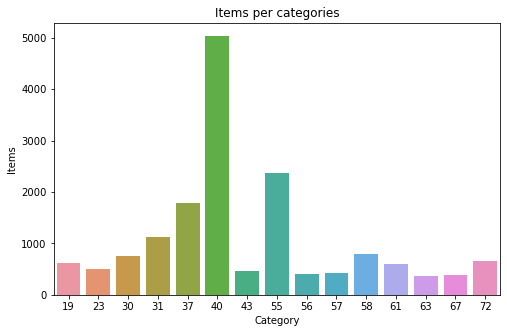

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(cat.item_category_id, cat.item_id)
plt.title("Items per categories")
plt.ylabel("Items")
plt.xlabel('Category')

Let's create a merged df

In [51]:
train = sales.join(items, on = 'item_id', rsuffix = '_')

In [52]:
train = train.drop(columns = ['month_of_year', 'year', 'item_id'])

In [53]:
train = train.join(shops, on = 'shop_id', rsuffix='_')

In [54]:
train = train.join(items_cat, on = 'item_category_id', rsuffix = '_')

In [55]:
train = train.drop(columns = ['shop_id', 'item_category_id'])

In [56]:
train = train.drop(columns = ['date_block_num'])

In [57]:
train

,date,item_price,item_cnt_day,day_of_week,item_name,item_id_,shop_name,shop_id_,item_category_name,item_category_id_
0,2013-01-02,999.00,1.0,2,ЯВЛЕНИЕ 2012 (BD),22154,"Ярославль ТЦ ""Альтаир""",59,Кино - Blu-Ray,37
1,2013-01-03,899.00,1.0,3,DEEP PURPLE The House Of Blue Light LP,2552,"Москва ТРК ""Атриум""",25,Музыка - Винил,58
2,2013-01-05,899.00,-1.0,5,DEEP PURPLE The House Of Blue Light LP,2552,"Москва ТРК ""Атриум""",25,Музыка - Винил,58
3,2013-01-06,1709.05,1.0,6,DEEP PURPLE Who Do You Think We Are LP,2554,"Москва ТРК ""Атриум""",25,Музыка - Винил,58
4,2013-01-15,1099.00,1.0,1,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),2555,"Москва ТРК ""Атриум""",25,Музыка - CD фирменного производства,56
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,299.00,1.0,5,V/A Nu Jazz Selection (digipack),7409,"Москва ТРК ""Атриум""",25,Музыка - CD локального производства,55
2935845,2015-10-09,299.00,1.0,4,V/A The Golden Jazz Collection 1 2CD,7460,"Москва ТРК ""Атриум""",25,Музыка - CD локального производства,55
2935846,2015-10-14,349.00,1.0,2,V/A The Best Of The 3 Tenors,7459,"Москва ТРК ""Атриум""",25,Музыка - CD локального производства,55
2935847,2015-10-22,299.00,1.0,3,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),7440,"Москва ТРК ""Атриум""",25,Музыка - MP3,57


In [58]:
train.item_name.value_counts()

Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм                                    31340
Playstation Store пополнение бумажника: Карта оплаты 1000 руб.                            9408
Прием денежных средств для 1С-Онлайн                                                      9067
Diablo III [PC, Jewel, русская версия]                                                    7479
Kaspersky Internet Security Multi-Device Russian Edition. 2-Device 1 year Renewal Box     6853
                                                                                         ...  
Артур и минипуты (PC-DVD) (Jewel)                                                            1
Первый Мститель: Суперсолдат (с поддержкой 3D) [PS3, русская документация]                   1
Dragon Ball Xenoverse + Dragon Ball Xenoverse. Season Pass [PC, Цифровая версия]             1
MANSON MARILYN  Lest We Forget  The Best Of                                                  1
БАНДЕРА АНДРЕЙ Так Начиналась Легенда.... DVD     

In [59]:
train.shop_name.value_counts()

Москва ТЦ "Семеновский"                            235636
Москва ТРК "Атриум"                                186104
Химки ТЦ "Мега"                                    143480
Москва ТЦ "МЕГА Теплый Стан" II                    142234
Якутск Орджоникидзе, 56                            117428
СПб ТК "Невский Центр"                             109253
Москва ТЦ "МЕГА Белая Дача II"                     105366
Воронеж (Плехановская, 13)                          82663
Якутск ТЦ "Центральный"                             71441
Чехов ТРЦ "Карнавал"                                69573
Сергиев Посад ТЦ "7Я"                               66321
Тюмень ТЦ "Гудвин"                                  65173
Курск ТЦ "Пушкинский"                               63911
Калуга ТРЦ "XXI век"                                59511
Н.Новгород ТРЦ "Фантастика"                         58445
Москва МТРЦ "Афи Молл"                              58133
Воронеж ТРЦ "Максимир"                              58076
Сургут ТРЦ "Си

In [60]:
train.groupby('item_name')['shop_id_'].value_counts().unstack()

shop_id_,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
item_name,,,,,,,,,,,,,,,,,,,,,
! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
"!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
***В ЛУЧАХ СЛАВЫ (UNV) D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
***ГОЛУБАЯ ВОЛНА (Univ) D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
***КОРОБКА (СТЕКЛО) D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Ядерный титбит 2 [PC, Цифровая версия]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
Язык запросов 1С:Предприятия [Цифровая версия],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,270.0,NaN,NaN,NaN,NaN
Язык запросов 1С:Предприятия 8 (+CD). Хрусталева Е.Ю.,NaN,NaN,17.0,5.0,4.0,4.0,24.0,5.0,NaN,NaN,...,2.0,1.0,15.0,10.0,35.0,NaN,4.0,2.0,3.0,4.0


In [1]:
import cudf 

ModuleNotFoundError: No module named 'cudf'